
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 1127072|


## Tarefas

### 0. Baixar o dataset pelo site ou pelo comando

```kaggle datasets download mlg-ulb/creditcardfraud``` 

# 1. Fazer a leitura do conjunto de dados  escolhido usando  bibliotecas prontas ou funções das linguagens de programação Python ou R, por exemplo a biblioteca Pandas do Python.

In [1]:
import pandas as pd
dtFolder = "../../datasets/"
df = pd.read_csv(dtFolder+"creditcardfraud.zip")

In [2]:
# Reorganizando colunas
cols = df.columns.tolist()
reord = [cols.pop(0),cols.pop(-2),cols.pop(-1)]
cols = reord + cols
df = df[cols]
df


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.77,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,172787.0,24.79,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,172788.0,67.88,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,172788.0,10.00,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [3]:
# Class: 1 se fraude, 0 se legítimo
fraude = df["Class"].value_counts().rename("Legalidade")
fraude = fraude.rename({0:"Legítimo",1:"Fraude"}).sort_values()
fraude

Fraude         492
Legítimo    284315
Name: Legalidade, dtype: int64

In [4]:
maioresFraudes = df.loc[df["Class"] == 1][["Amount","Class"]].sort_values("Amount",ascending=False).head(10)
maioresFraudes.reset_index(drop=True).rename(columns={"Class":"Legalidade"})

,Amount,Legalidade
0,2125.87,1
1,1809.68,1
2,1504.93,1
3,1402.16,1
4,1389.56,1
5,1354.25,1
6,1335.00,1
7,1218.89,1
8,1096.99,1
9,996.27,1


# 2. Verificar se existem dados faltantes no conjunto de dados escolhido, caso sim, pesquise como lidar com eles.

In [5]:
# is null(0 ou 1) pra cada uma das colunas e soma a quantidade de nulos de cada coluna
qtdNulls = df.isnull().sum(axis = 0).rename("Qtd. de null")
qtdNulls

Time      0
Amount    0
Class     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Name: Qtd. de null, dtype: int64

# 3. Se o conjunto de dados escolhido é desbalanceado, aplique alguma técnica de rebalanceamento existente nas bibliotecas do Python ou R.

## Pré-Rebalanceamento

<AxesSubplot:title={'center':'Tipo de Transações'}>

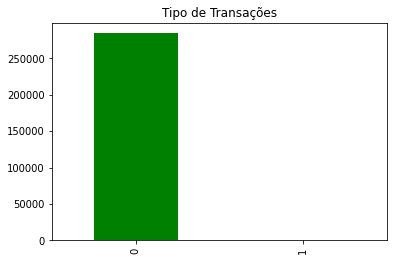

In [6]:
dfRen = df
# dfRen.loc[dfRen["Class"] == 0, "Class"] = "Legal"
# dfRen.loc[dfRen["Class"] == 1, "Class"] = "Fraude"
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"Legal","red":"Fraude"}, title="Tipo de Transações") #lol

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random undersampling, já que nosso dataset possui a proporção de aproximadamente 1:500 entre os tipos de transação.

<AxesSubplot:title={'center':'Tipo de Transações'}>

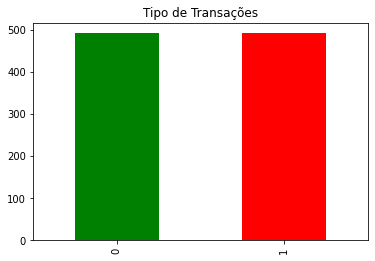

In [7]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == 0].reset_index()
df_fraude = dfRen[dfRen["Class"] == 1].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_legal_under = df_legal.sample(count_fraude, random_state=1) 

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_fraude,df_legal_under], axis=0, ignore_index=True).drop(columns=["index"])
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")



# 4. Aplicar alguma técnica de normalização nos dados.


In [8]:
# Normalização por MinMaxScaler, onde os valores ficarão entre 0 e 1, que será útil para algoritmos de aprendizado
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_balanced)
df_mm = pd.DataFrame(df_mm, columns=cols)
df_mm


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.001466,0.000000,1.0,0.858488,0.410352,0.857855,0.482374,0.650089,0.386613,0.825923,...,0.460016,0.304576,0.466293,0.513187,0.760060,0.715546,0.690451,0.353048,0.729425,0.430757
1,0.001848,0.189361,1.0,0.836256,0.260510,0.936338,0.373370,0.706774,0.414696,0.883568,...,0.445021,0.430239,0.469182,0.540466,0.834540,0.528449,0.724111,0.271607,0.679606,0.472602
2,0.024966,0.085886,1.0,0.858757,0.404699,0.894216,0.376023,0.641069,0.491482,0.888335,...,0.263457,0.269148,0.450065,0.461164,0.785866,0.591365,0.661747,0.171501,0.707945,0.428478
3,0.039589,0.021120,1.0,0.795082,0.392943,0.829264,0.398314,0.631838,0.364875,0.806618,...,0.447826,0.285586,0.467419,0.525479,0.761234,0.601673,0.720192,0.142558,0.623928,0.662805
4,0.042677,0.000358,1.0,0.966298,0.441666,0.779476,0.529239,0.774977,0.391954,0.911512,...,0.107747,0.297079,0.448367,0.474395,0.752310,0.120477,0.897092,0.451060,0.703139,0.498551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.196625,0.020010,0.0,0.970875,0.335100,0.890901,0.158512,0.661764,0.507244,0.870524,...,0.463842,0.274340,0.437418,0.373917,0.783228,0.174962,0.685616,0.459986,0.695827,0.462661
980,0.852380,0.061945,0.0,0.908627,0.351242,0.891474,0.250741,0.664218,0.351577,0.904587,...,0.360579,0.278468,0.462329,0.577650,0.802026,0.863474,0.624274,0.258542,0.715601,0.484282
981,0.663855,0.031501,0.0,0.896180,0.312522,0.936979,0.032419,0.676513,0.492495,0.874292,...,0.374348,0.259524,0.451420,0.530621,0.761163,0.733262,0.644270,0.207230,0.658703,0.422016
982,0.710228,0.017891,0.0,0.911142,0.369778,0.962860,0.192231,0.671919,0.520991,0.892395,...,0.461205,0.305673,0.451585,0.484146,0.772110,0.785036,0.726551,0.190367,0.693715,0.431184


In [9]:
# Mostrando o valor máximo de cada coluna, para mostrar que está normalizado
[(col,{"Max":df_mm[col].max(), "Min":df_mm[col].min() }) for col in df_mm.columns]


[('Time', {'Max': 0.9999999999999999, 'Min': 0.0}),
 ('Amount', {'Max': 1.0, 'Min': 0.0}),
 ('Class', {'Max': 1.0, 'Min': 0.0}),
 ('V1', {'Max': 1.0, 'Min': 0.0}),
 ('V2', {'Max': 1.0, 'Min': 0.0}),
 ('V3', {'Max': 1.0, 'Min': 0.0}),
 ('V4', {'Max': 1.0, 'Min': 0.0}),
 ('V5', {'Max': 1.0, 'Min': 0.0}),
 ('V6', {'Max': 0.9999999999999999, 'Min': 0.0}),
 ('V7', {'Max': 0.9999999999999998, 'Min': 0.0}),
 ('V8', {'Max': 0.9999999999999999, 'Min': 0.0}),
 ('V9', {'Max': 1.0000000000000002, 'Min': 0.0}),
 ('V10', {'Max': 1.0, 'Min': 0.0}),
 ('V11', {'Max': 1.0, 'Min': 0.0}),
 ('V12', {'Max': 1.0, 'Min': 0.0}),
 ('V13', {'Max': 1.0, 'Min': 0.0}),
 ('V14', {'Max': 1.0, 'Min': 0.0}),
 ('V15', {'Max': 1.0, 'Min': 0.0}),
 ('V16', {'Max': 1.0, 'Min': 0.0}),
 ('V17', {'Max': 1.0, 'Min': 0.0}),
 ('V18', {'Max': 1.0, 'Min': 0.0}),
 ('V19', {'Max': 1.0, 'Min': 0.0}),
 ('V20', {'Max': 1.0, 'Min': 0.0}),
 ('V21', {'Max': 1.0, 'Min': 0.0}),
 ('V22', {'Max': 1.0, 'Min': 0.0}),
 ('V23', {'Max': 1.0, 'Min':

# 5. Fazer uma análise exploratória do conjunto de dados escolhido (calcular médias, medianas, variâncias, min, max)

In [10]:
desc = df_mm.describe()
desc.drop(index=["count"], inplace=True)
desc.loc["median"] = df.median(axis=0)
desc.reindex(["mean","median","std","min","max","25%","50%","75%"])

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,0.521734,0.041410,0.500000,0.856895,0.404230,0.802675,0.372835,0.618370,0.445464,0.821626,...,0.449817,0.310023,0.462935,0.514706,0.777904,0.599823,0.686288,0.316834,0.712693,0.476223
median,84692.000000,22.000000,0.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,...,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244
std,0.279560,0.096369,0.500254,0.168059,0.109562,0.181251,0.205069,0.126794,0.136060,0.118161,...,0.146105,0.068578,0.055588,0.068435,0.047266,0.171581,0.096724,0.119364,0.096528,0.097894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.281895,0.000544,0.000000,0.844020,0.346378,0.755749,0.218828,0.611285,0.373159,0.815271,...,0.361171,0.282920,0.452541,0.482406,0.769601,0.494303,0.636002,0.237221,0.697016,0.450313
50%,0.486976,0.006787,0.500000,0.905181,0.378351,0.864017,0.313906,0.651526,0.449408,0.864767,...,0.435395,0.297855,0.459097,0.515270,0.778039,0.616464,0.692215,0.305873,0.708885,0.472582
75%,0.786520,0.035796,1.000000,0.959582,0.434564,0.915474,0.501981,0.680263,0.507695,0.882817,...,0.523830,0.328290,0.469043,0.548013,0.786822,0.729417,0.740107,0.397566,0.748429,0.516837
